# Multi-session analysis
This notebook demonstrate how to combine different xarray dataset together and perform group-level analysis

In [2]:
%reload_ext autoreload
%autoreload 2
import xarray as xr
import matplotlib.pylab as plt
import seaborn as sns
from pathlib import Path
import pandas as pd
from tqdm import tqdm
import numpy as np
from glob import glob
import re
from datetime import datetime
from trialexp.process.folder_org.utils import build_session_info, load_and_concat_dataset, filter_sessions

## Build dataframe containing the metadata of all sessions

`build_session_info` will extract information from the by_sessions folder and build a dataframe for further filtering


In [3]:
#specify the location of the by_sessions folder here
root_path = '/home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/head-fixed/by_sessions'

df_session_info = build_session_info(root_path, load_pycontrol=True, pycontrol_parameters=['hold_time_required_ms', 'US_delay_ms'], param_extract_method='tail')
df_session_info['hold_time_required_ms']=df_session_info['hold_time_required_ms'].astype(float)
df_session_info['US_delay_ms'] = df_session_info['US_delay_ms'].astype(float)

## Loading data

`filter_sessions` provide a set of functions for filtering recording sessions. For details on how to use it, please consult its documentation

In [4]:
#select the last 5 sessions from animal kms058
df_sel = filter_sessions(df_session_info,session_no=3, 
                         animal_id=['TT001', 'TT002','TT005', 'RE606','RE607'],
                         session_method='tail', 
                         task_name='reaching_go_spout_bar_nov22', 
                         query='hold_time_required_ms >= 1000 and US_delay_ms>=500')
df_sel.sort_values(['animal_id','expt_datetime'])

animal_id       expt_datetime               session_id  \
233     RE606 2023-06-01 12:12:01  RE606-2023-06-01-121201   
185     RE606 2023-06-02 10:40:01  RE606-2023-06-02-104001   
293     RE606 2023-06-05 12:09:00  RE606-2023-06-05-120900   
297     RE607 2023-05-31 12:59:59  RE607-2023-05-31-125959   
234     TT001 2023-06-02 16:36:05  TT001-2023-06-02-163605   
247     TT001 2023-06-05 16:16:10  TT001-2023-06-05-161610   
280     TT002 2023-06-02 15:54:42  TT002-2023-06-02-155442   
296     TT002 2023-06-05 15:49:32  TT002-2023-06-05-154932   
257     TT005 2023-06-02 15:23:09  TT005-2023-06-02-152309   
359     TT005 2023-06-02 16:04:27  TT005-2023-06-02-160427   
242     TT005 2023-06-05 14:59:11  TT005-2023-06-05-145911   

                       task_name  \
233  reaching_go_spout_bar_nov22   
185  reaching_go_spout_bar_nov22   
293  reaching_go_spout_bar_nov22   
297  reaching_go_spout_bar_nov22   
234  reaching_go_spout_bar_nov22   
247  reaching_go_spout_bar_nov22   
280  reaching_go_spout_bar_nov22   
296  reaching_go_spout_bar_nov22   
257  reaching_go_spout_bar_nov22   
359  reaching_go_spout_bar_nov22   
242  reaching_go_spout_bar_nov22   

                                                  path  session_no  \
233  /home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/...         6.0   
185  /home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/...         7.0   
293  /home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/...         8.0   
297  /home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/...         7.0   
234  /home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/...         8.0   
247  /home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/...         9.0   
280  /home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/...         9.0   
296  /home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/...        10.0   
257  /home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/...         9.0   
359  /home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/...        10.0   
242  /home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/...        11.0   

     US_delay_ms  hold_time_required_ms  
233        500.0                 1000.0  
185        500.0                 1000.0  
293        500.0                 1000.0  
297        500.0                 1000.0  
234        500.0                 1000.0  
247        500.0                 1000.0  
280        500.0                 1000.0  
296        500.0                 1000.0  
257        500.0                 1000.0  
359        500.0                 1000.0  
242        500.0                 1000.0

`load_and_conat_dataset` is a helper functions that combines multiple sessions of dataset together

In [8]:
paths = df_sel.path
ds_combined = load_and_concat_dataset(paths)

  0%|          | 0/11 [00:00<?, ?it/s]

-1995.499099819964 /home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/head-fixed/by_sessions/reaching_go_spout_bar_nov22/RE606-2023-06-01-121201
-1995.499099819964 /home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/head-fixed/by_sessions/reaching_go_spout_bar_nov22/RE606-2023-06-02-104001
-1995.499099819964 /home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/head-fixed/by_sessions/reaching_go_spout_bar_nov22/RE607-2023-05-31-125959
-1995.499099819964 /home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/head-fixed/by_sessions/reaching_go_spout_bar_nov22/TT001-2023-06-02-163605
-1995.499099819964 /home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/head-fixed/by_sessions/reaching_go_spout_bar_nov22/RE606-2023-06-05-120900
-1995.499099819964 /home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/head-fixed/by_sessions/reaching_go_spout_bar_nov22/TT002-2023-06-02-155442
-1995.499099819964 /home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/head-fixed/by_sessions/reaching_go_spout_bar_nov22/TT005-2023-06-02-152309
-1995.499099819964 /

In [6]:
ds_combined

<xarray.Dataset>
Dimensions:                           (trial_nb: 508, event_time: 500,
                                       session_id: 11)
Coordinates:
  * trial_nb                          (trial_nb) int64 1 2 3 4 ... 506 507 508
  * event_time                        (event_time) float64 -1.995e+03 ... 2.9...
  * session_id                        (session_id) object 'RE606-2023-06-01-1...
Data variables: (12/21)
    uid                               (session_id, trial_nb) object 'RE606_20...
    trigger                           (session_id, trial_nb) object 'hold_for...
    valid                             (session_id, trial_nb) float64 1.0 ... nan
    Go_to_get_water                   (session_id, trial_nb) float64 0.0 ... nan
    US_end_timer                      (session_id, trial_nb) float64 1.0 ... nan
    break_after_abort                 (session_id, trial_nb) float64 0.0 ... nan
    ...                                ...
    success                           (session_id, trial_nb) float64 0.0 ... nan
    trial_outcome                     (session_id, trial_nb) object 'button_p...
    hold_for_water_zscored_df_over_f  (session_id, trial_nb, event_time) float64 ...
    first_bar_off_zscored_df_over_f   (session_id, trial_nb, event_time) float64 ...
    first_spout_zscored_df_over_f     (session_id, trial_nb, event_time) float64 ...
    last_bar_off_zscored_df_over_f    (session_id, trial_nb, event_time) float64 ...

In [7]:
ds_combined.event_time

<xarray.DataArray 'event_time' (event_time: 500)>
array([-1995.4991  , -1985.497099, -1975.495099, ...,  2975.495099,
        2985.497099,  2995.4991  ])
Coordinates:
  * event_time  (event_time) float64 -1.995e+03 -1.985e+03 ... 2.995e+03

## Plot figures

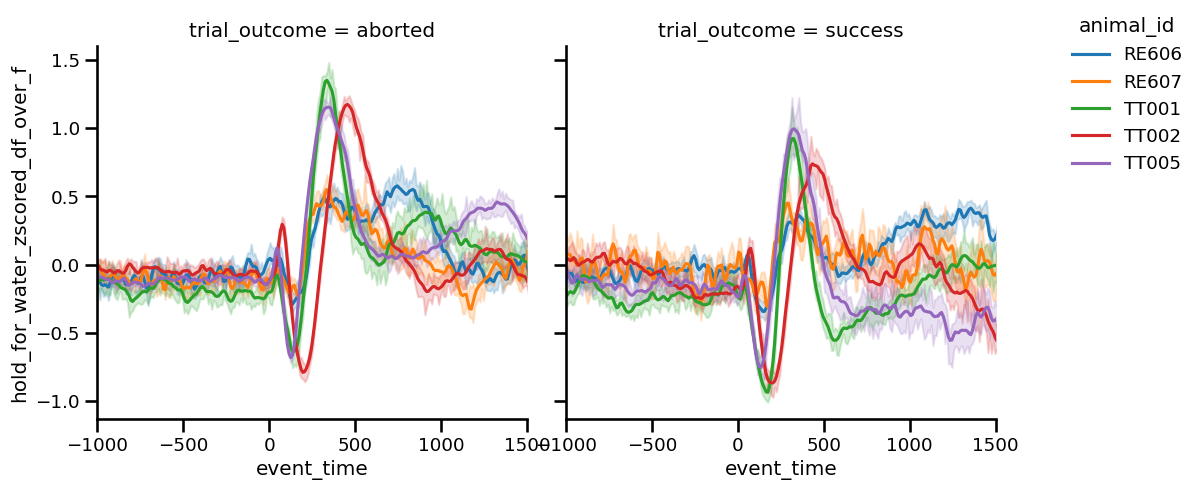

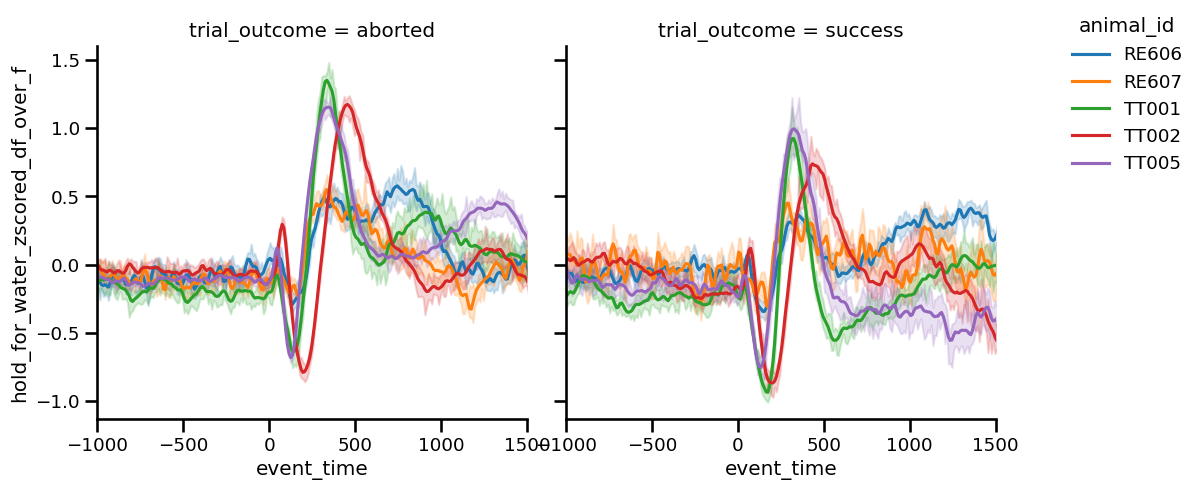

In [9]:
sns.set_context('talk',font_scale=0.8)

animal_id = df_sel[['animal_id','session_id']]

def plot_subject_average(ds_combined, animal_id, var_name):

    df2plot = ds_combined[[var_name, 'trial_outcome','session_id']].to_dataframe().reset_index()

    #only plot several outcomes
    sel_trial_outcome = ['success', 'aborted']
    df2plot = df2plot[df2plot.trial_outcome.isin(sel_trial_outcome)]


    #merge the animal_id back to the data frame
    df2plot = df2plot.merge(animal_id, on='session_id')

    g = sns.relplot(x='event_time',y=var_name, hue='animal_id',
                col='trial_outcome', col_wrap=3, kind='line', n_boot=10, data=df2plot)
    
    g.set(xlim=[-1000, 1500])
    sns.move_legend(g, "upper right", bbox_to_anchor=[0.75,1])
    
    return g.figure
    
    
plot_subject_average(ds_combined, animal_id, 'hold_for_water_zscored_df_over_f')

(<Figure size 540x540 with 1 Axes>,
 <Axes: xlabel='event_time', ylabel='hold_for_water_zscored_df_over_f'>)

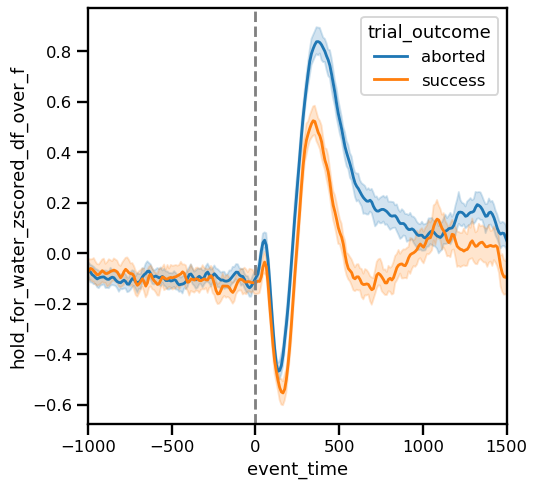

In [7]:
def plot_group_average(ds_combined, animal_id, var_name):
    fig, ax = plt.subplots(1,1,dpi=90, figsize=(6,6))
    df2plot = ds_combined[[var_name, 'trial_outcome','session_id']].to_dataframe().reset_index()

    #only plot several outcomes
    sel_trial_outcome = ['success', 'aborted']
    df2plot = df2plot[df2plot.trial_outcome.isin(sel_trial_outcome)]


    #merge the animal_id back to the data frame
    df2plot = df2plot.merge(animal_id, on='session_id')

    ax = sns.lineplot(x='event_time',y=var_name, hue='trial_outcome', n_boot=100, data=df2plot, ax=ax)
    ax.axvline(0,ls='--',color='gray')
    ax.set_xlim([-1000,1500])
    
    return fig,ax
    
plot_group_average(ds_combined, animal_id, 'hold_for_water_zscored_df_over_f')

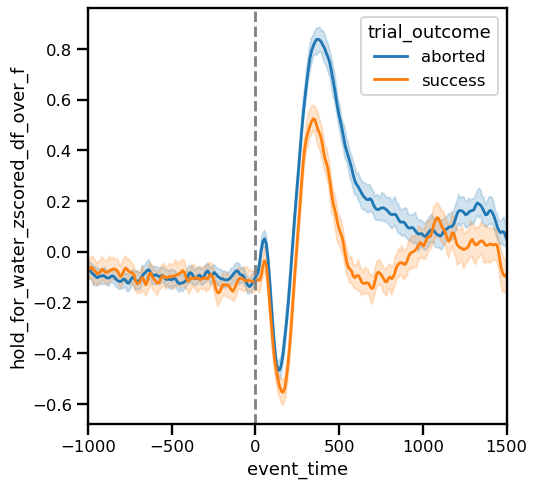

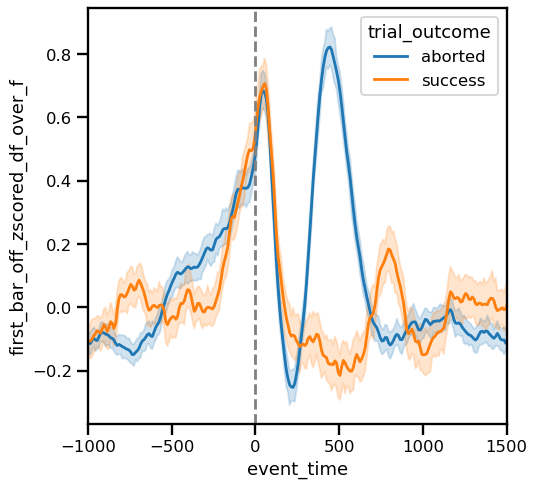

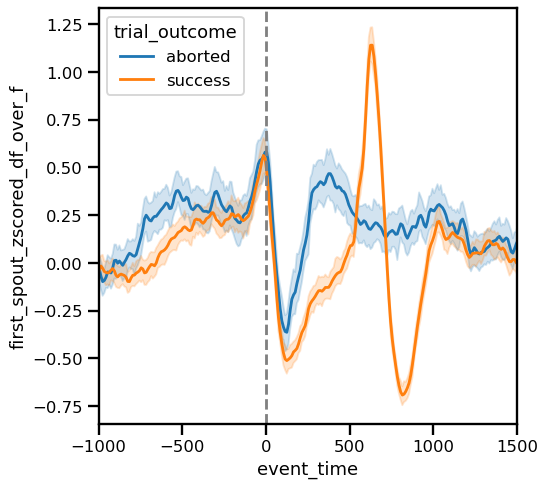

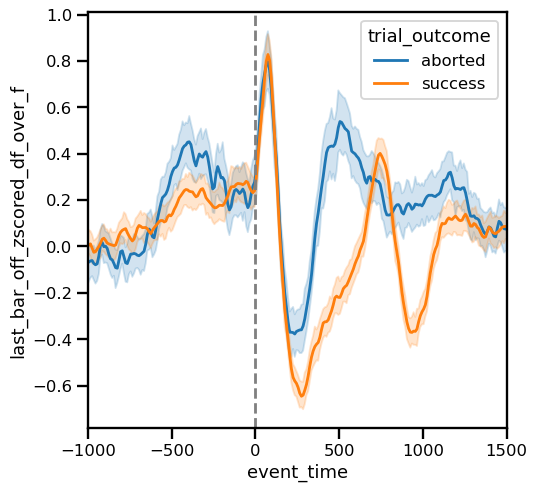

In [11]:
vars_to_plot = ['hold_for_water_zscored_df_over_f', 
                'first_bar_off_zscored_df_over_f',
                'first_spout_zscored_df_over_f',
                'last_bar_off_zscored_df_over_f']

for v in vars_to_plot:
    fig,ax = plot_group_average(ds_combined, animal_id, v)
    fig.savefig(f'figures/{v}_group_average.png', bbox_inches='tight')

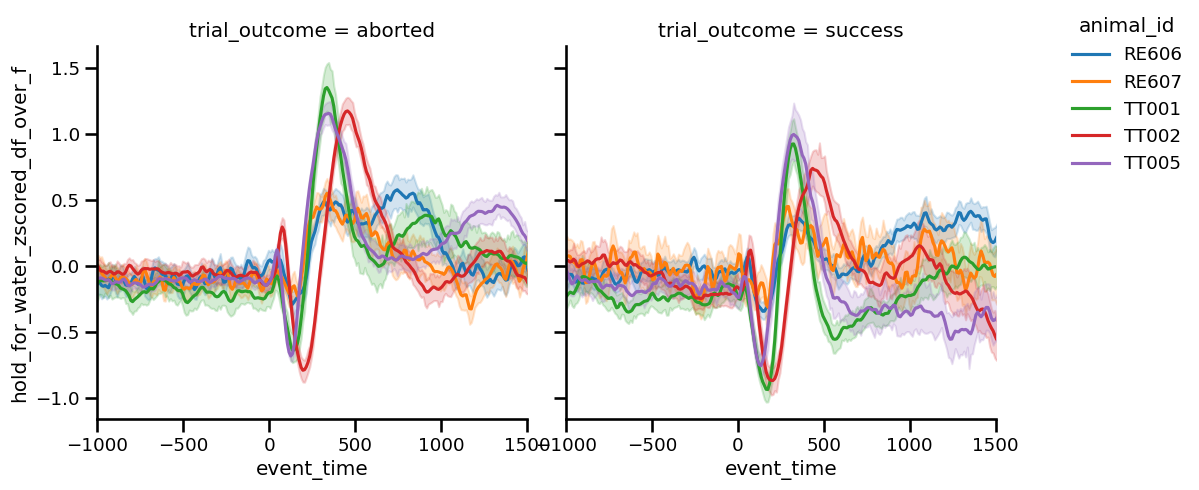

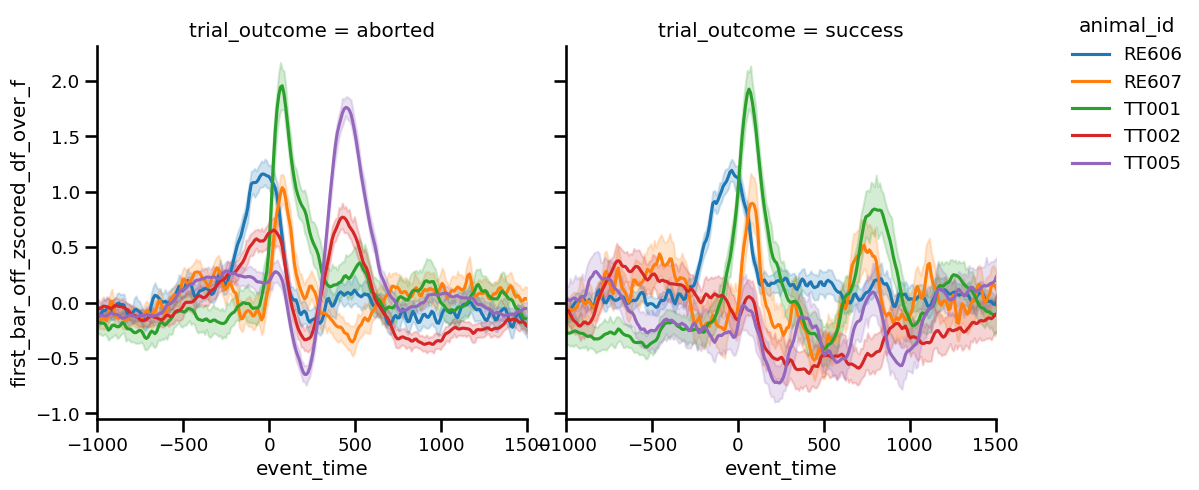

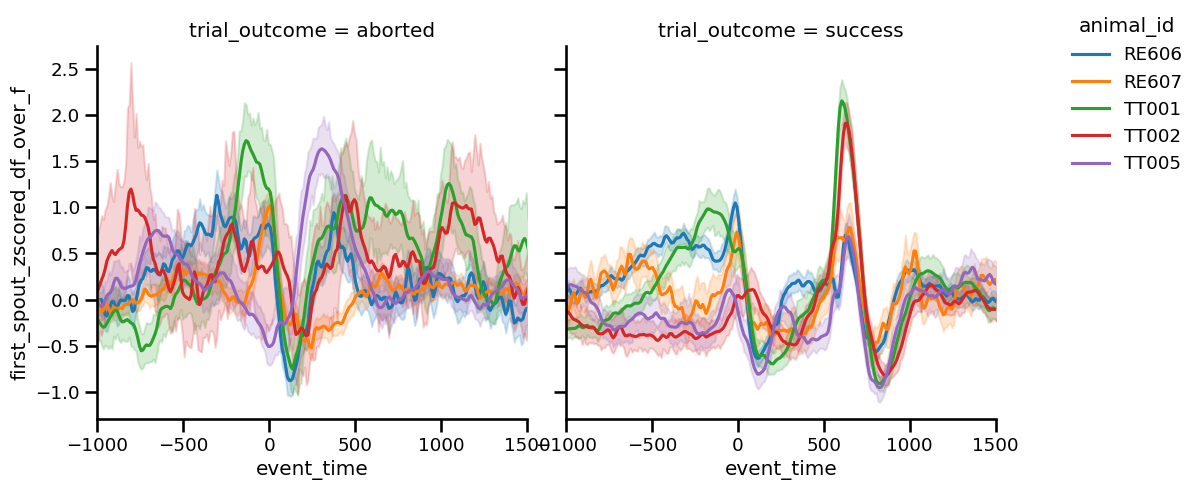

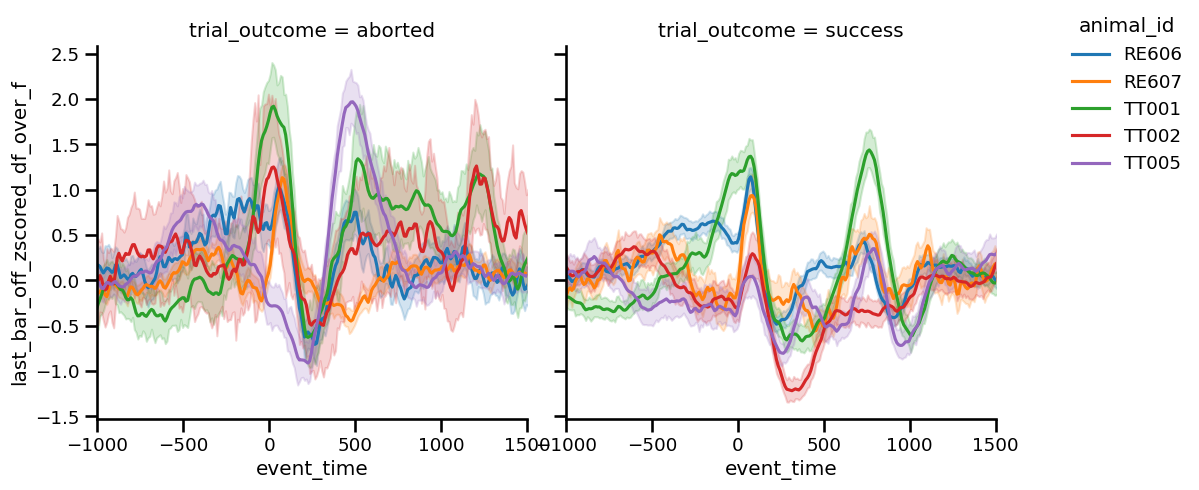

In [21]:
vars_to_plot = ['hold_for_water_zscored_df_over_f', 
                'first_bar_off_zscored_df_over_f',
                'first_spout_zscored_df_over_f',
                'last_bar_off_zscored_df_over_f']

for v in vars_to_plot:
    fig = plot_subject_average(ds_combined, animal_id, v)
    fig.savefig(f'figures/{v}_subjecct_average.png', bbox_inches='tight')

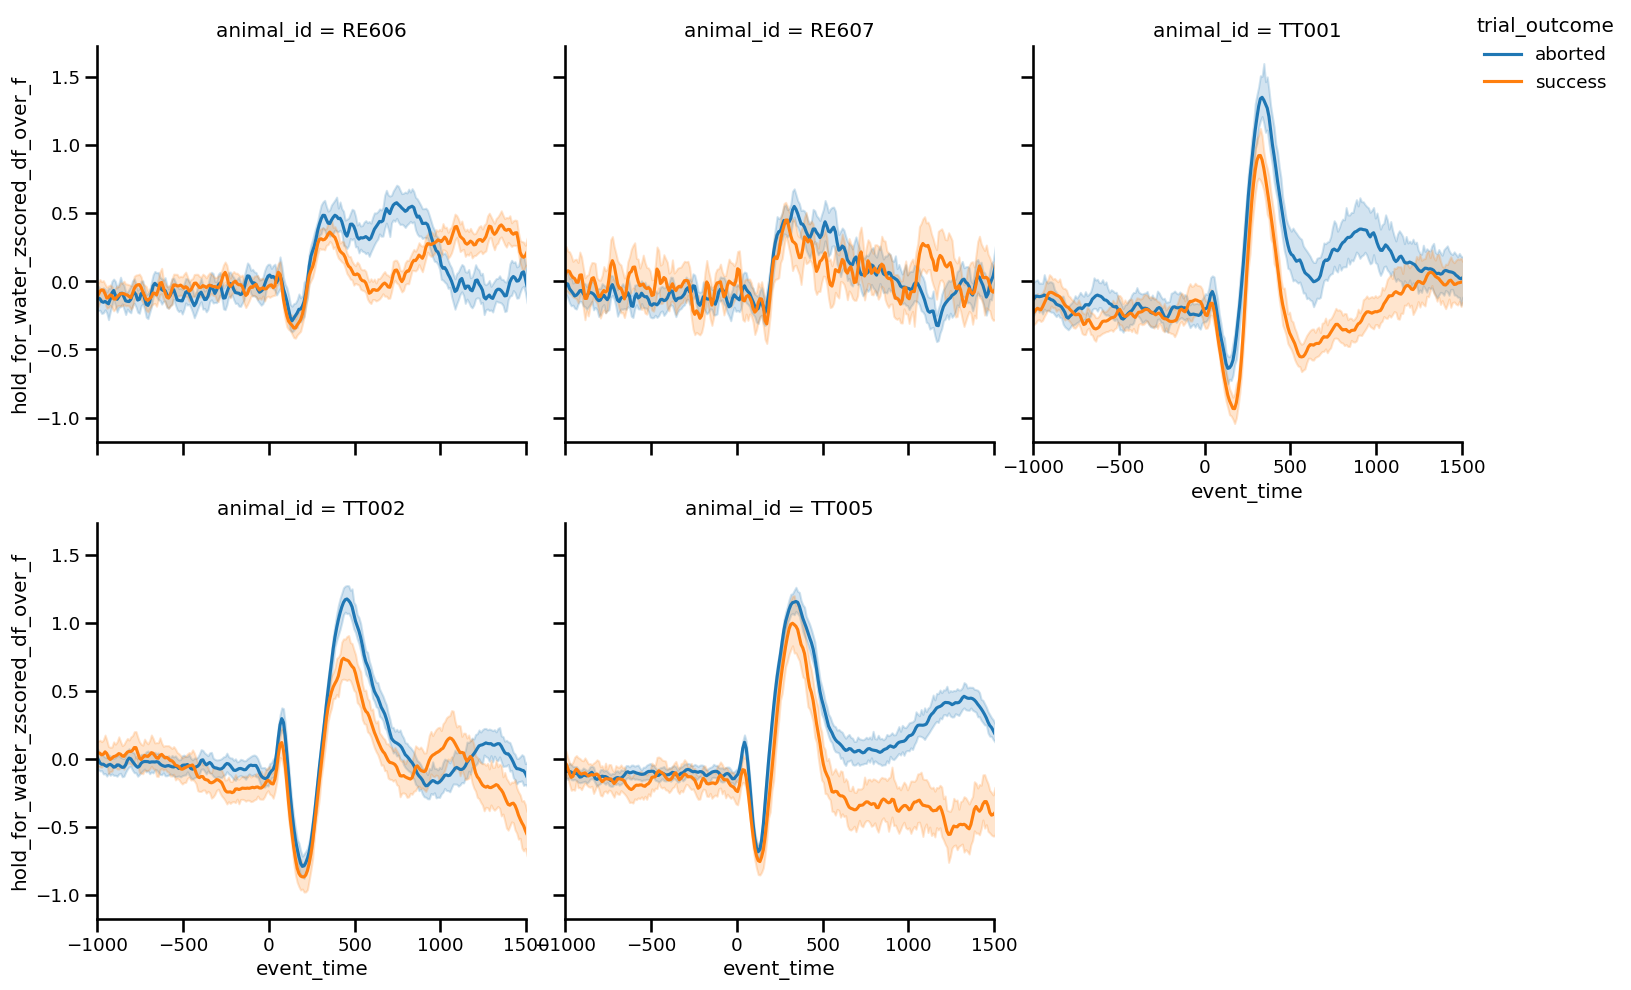

In [25]:
def plot_subject_comparison(ds_combined, animal_id, var_name):

    df2plot = ds_combined[[var_name, 'trial_outcome','session_id']].to_dataframe().reset_index()

    #only plot several outcomes
    sel_trial_outcome = ['success', 'aborted']
    df2plot = df2plot[df2plot.trial_outcome.isin(sel_trial_outcome)]


    #merge the animal_id back to the data frame
    df2plot = df2plot.merge(animal_id, on='session_id')

    g = sns.relplot(x='event_time',y=var_name, hue='trial_outcome',
                col='animal_id', col_wrap=3, kind='line', n_boot=100, data=df2plot)
    
    g.set(xlim=[-1000, 1500])
    sns.move_legend(g, "upper right", bbox_to_anchor=[1,1])
    
    return g.figure

plot_subject_comparison(ds_combined, animal_id, 'hold_for_water_zscored_df_over_f');

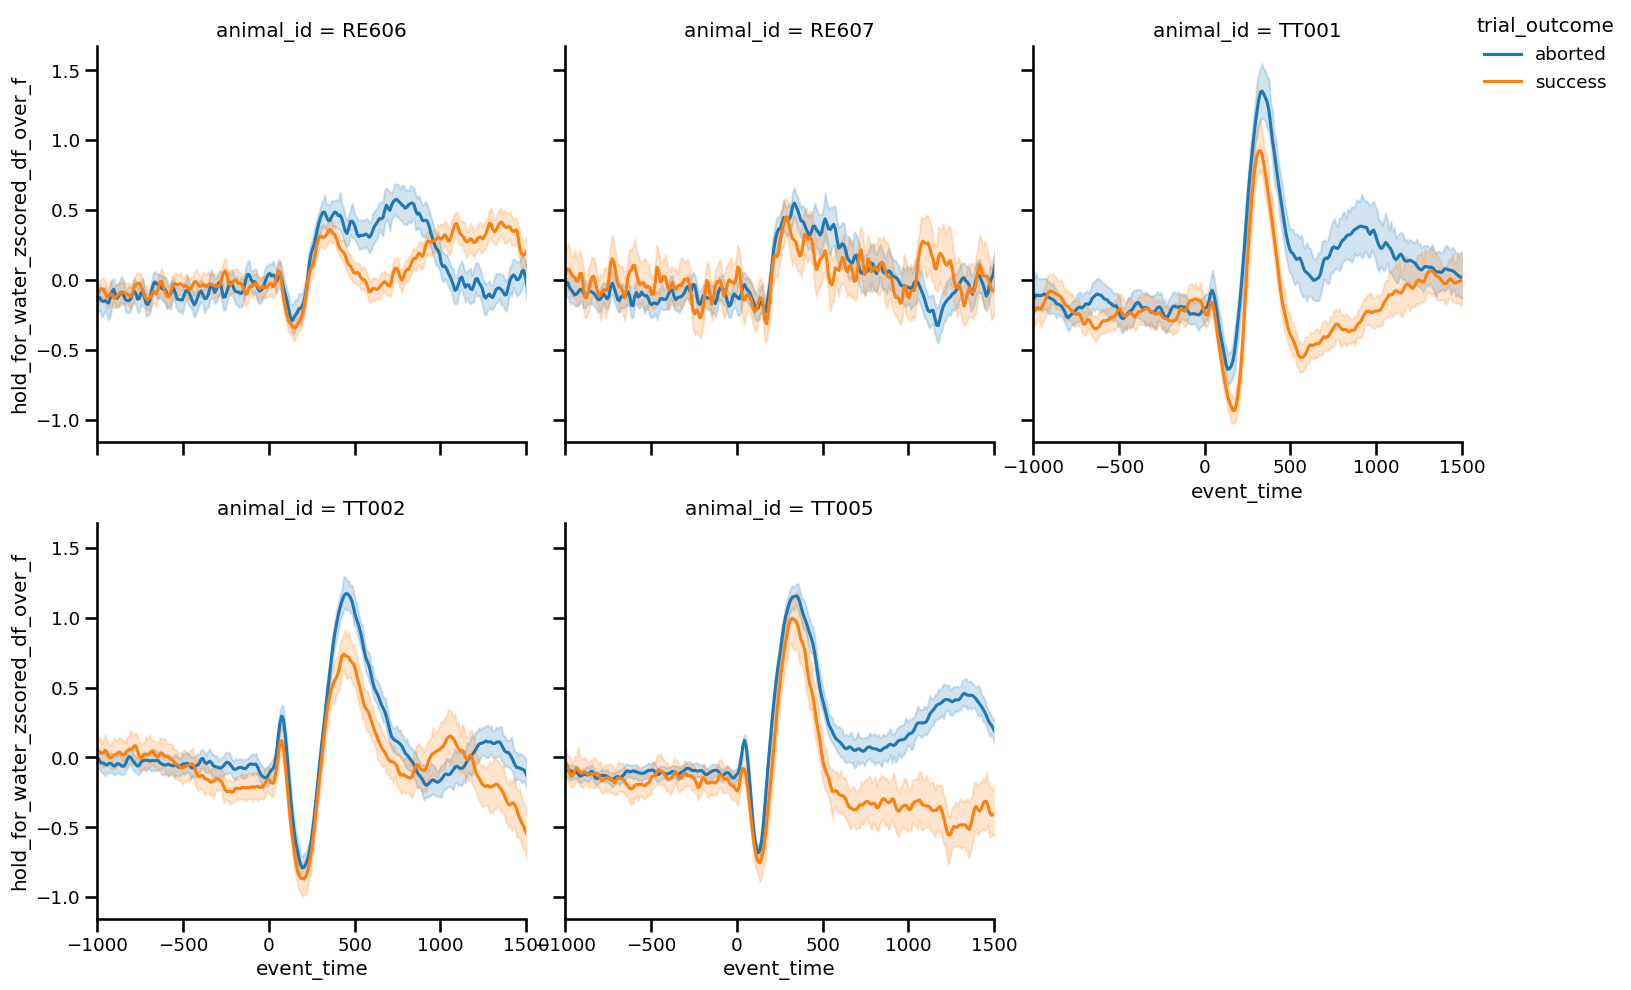

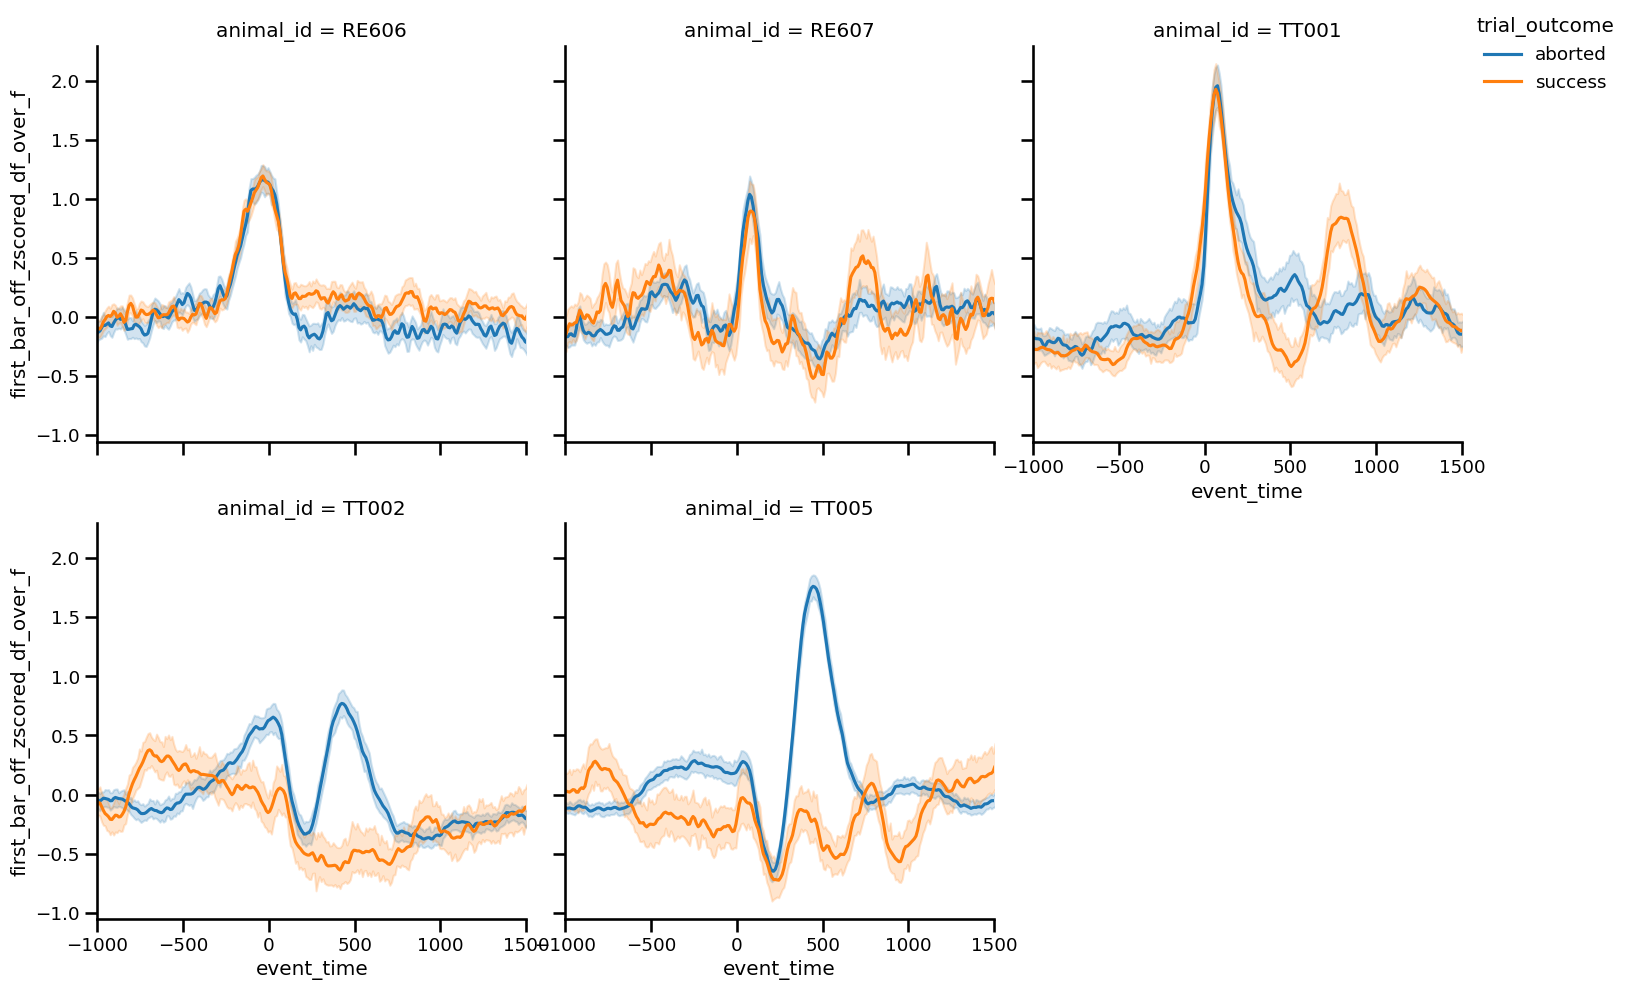

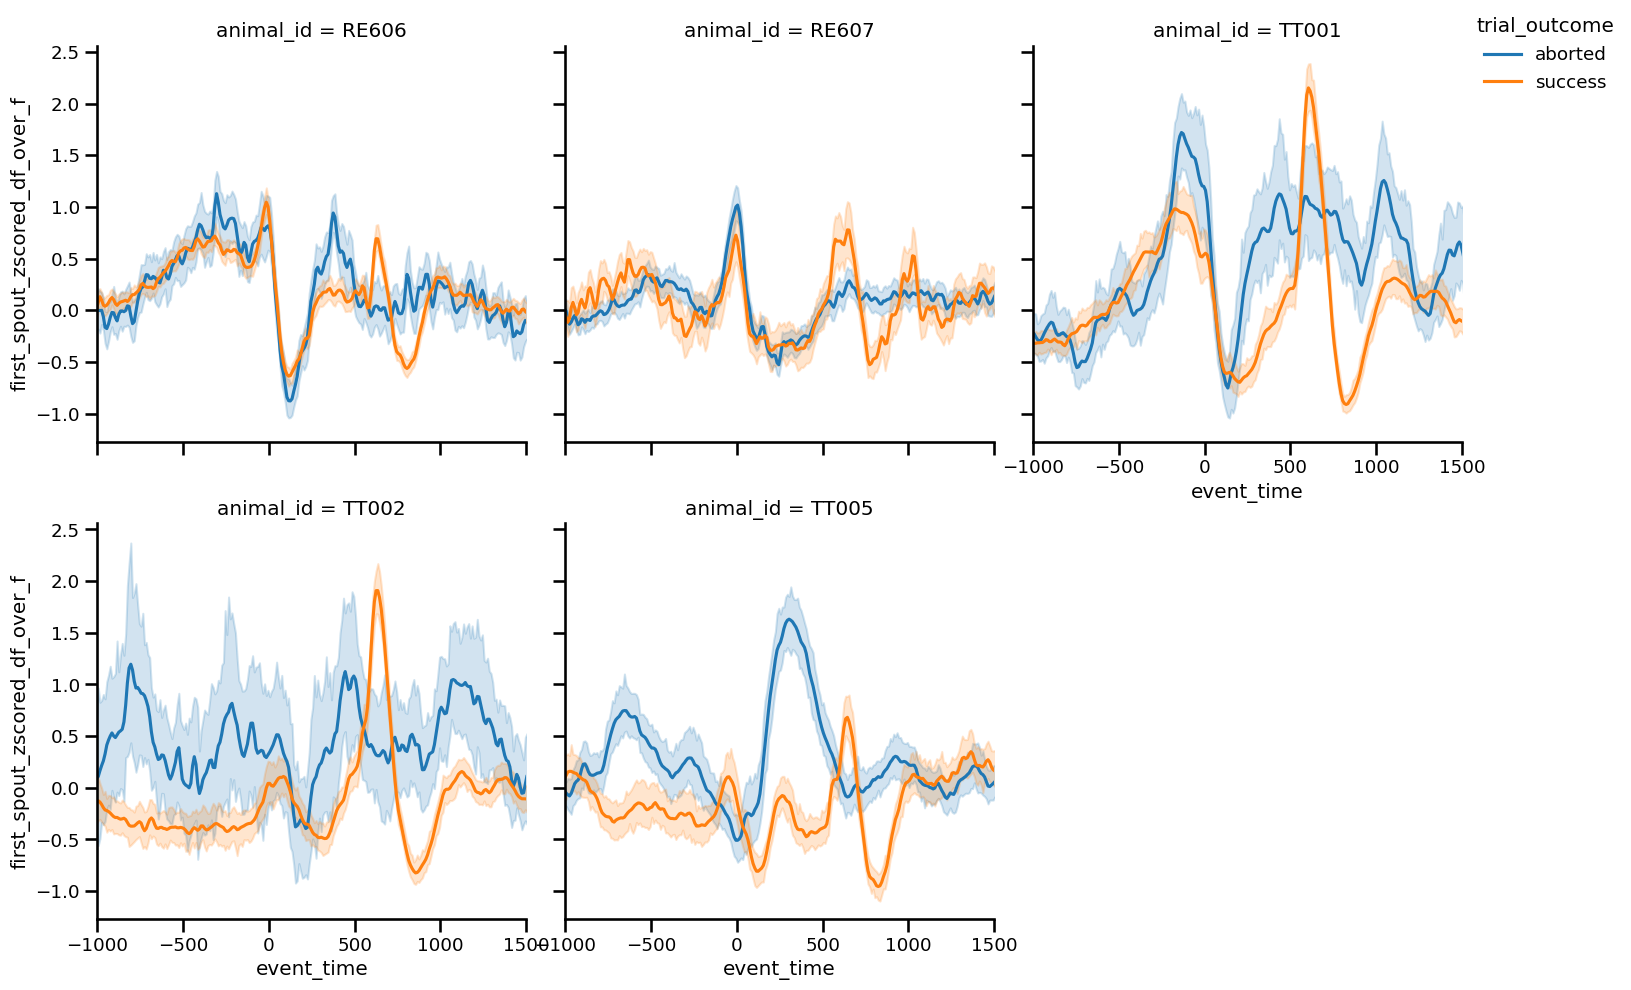

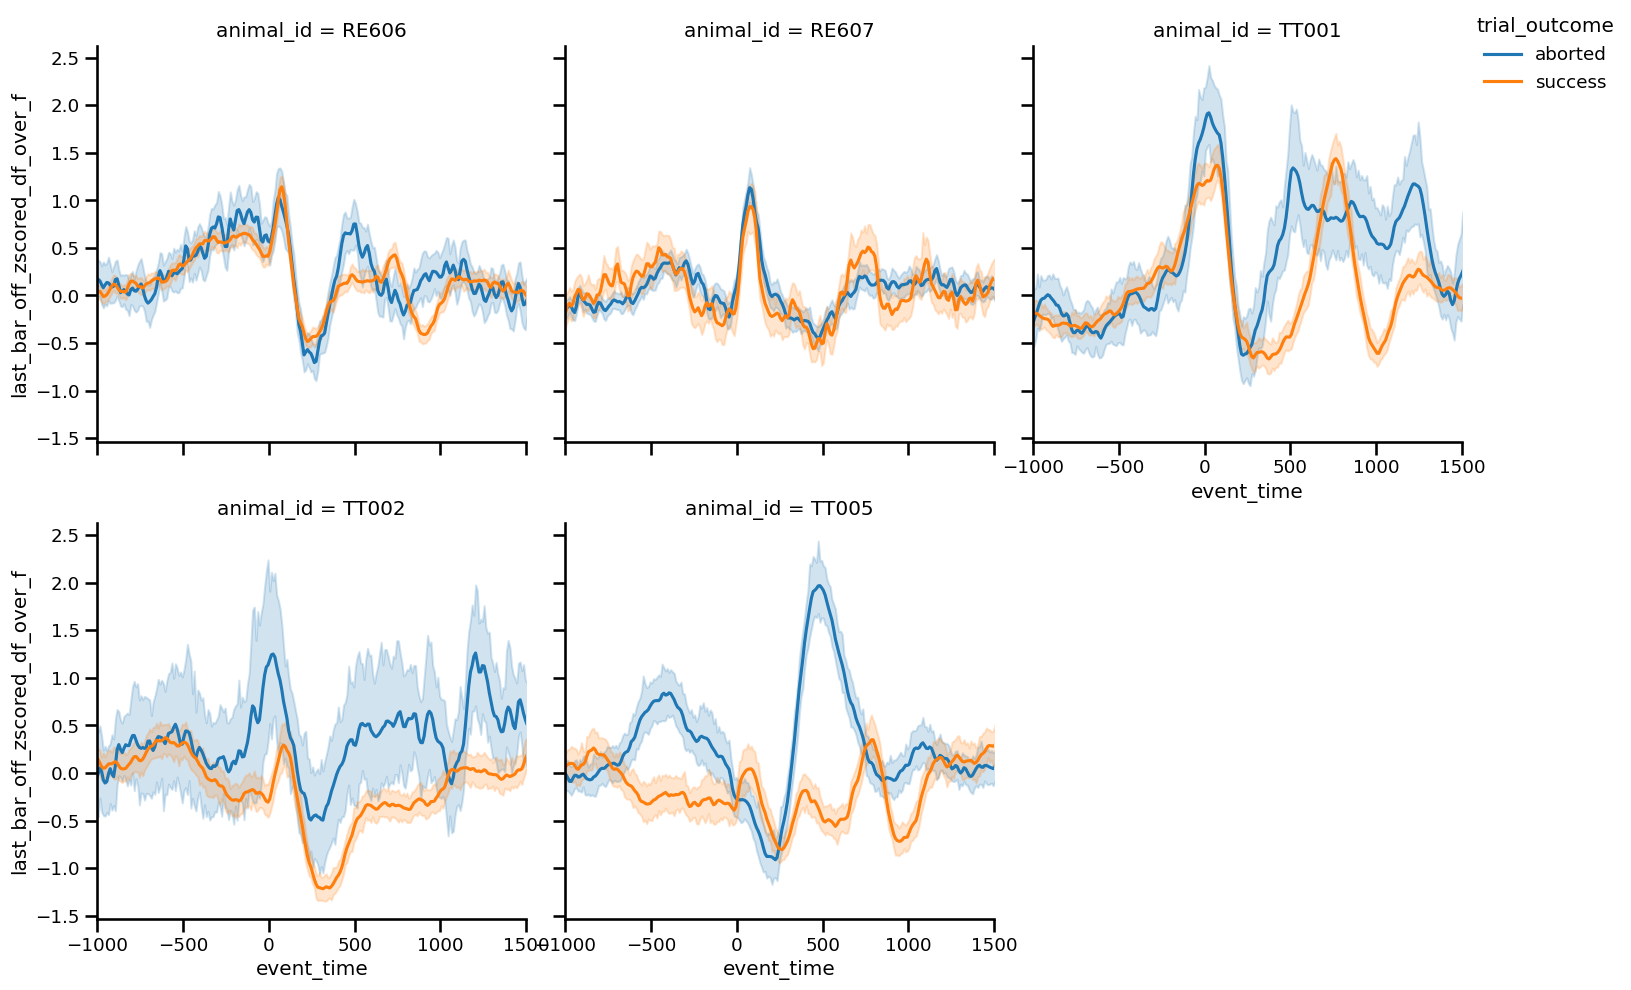

In [26]:
for v in vars_to_plot:
    fig = plot_subject_comparison(ds_combined, animal_id, v)
    fig.savefig(f'figures/{v}_subjecct_comparison.png', bbox_inches='tight');